<a href="https://colab.research.google.com/github/SushilKokare/AtiNeu_Project/blob/keras.applications/KA_4_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras import backend as k
from keras.applications.resnet import ResNet50
from matplotlib import pyplot as plt

In [5]:
def show_result(history):
  plt.figure(figsize=(5,3))
  plt.title("Loss Training Vs Validation")
  plt.plot(history.history['loss'],color='blue',label='Train Loss')
  plt.plot(history.history['val_loss'],color='orange',label='Val Loss')
  plt.legend()
  plt.show()

  plt.figure(figsize=(5,3))
  plt.title("Accuracy Training Vs Validation")
  plt.plot(history.history['accuracy'],color='blue',label='Train Acc')
  plt.plot(history.history['val_accuracy'],color='orange',label='Val Acc')
  plt.legend()
  plt.show()

In [6]:
def prepro_data(pathTrain,pathTest,img_size,batch_size):
  
  if k.image_data_format() == 'channels_first':
    input_shape = (3,img_size[0],img_size[1])
  else:
    input_shape = (img_size[0],img_size[1],3)

  train_gen = ImageDataGenerator(rescale = 1./255)
  test_gen = ImageDataGenerator(rescale = 1./255)

  train_data = train_gen.flow_from_directory(
      pathTrain,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  ) 

  test_data = test_gen.flow_from_directory(
      pathTest,
      target_size = img_size,
      # batch_size = batch_size,
      class_mode = 'binary'
  )

  print(" Train Data Image Shape = {}".format(train_data.image_shape))
  print(" Test Data Image Shape = {}".format(test_data.image_shape))
  print("Input Shape = {} ".format(input_shape))

  return train_data , test_data , input_shape

In [7]:
pathTrain = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Train'
pathTest = '/content/drive/MyDrive/AtiNeu Project/Data/MRI/Brain_Data_Organised/Test'

In [8]:
train_data , test_data, input_shape = prepro_data(pathTrain,pathTest,(225,225),32)

Found 2251 images belonging to 2 classes.
Found 250 images belonging to 2 classes.
 Train Data Image Shape = (225, 225, 3)
 Test Data Image Shape = (225, 225, 3)
Input Shape = (225, 225, 3) 


In [9]:
base_model = ResNet50(weights = 'imagenet',include_top = False,
                      input_shape = input_shape)

94765736/94765736 [==============================] - 1s 0us/step


In [10]:
for layer in base_model.layers:
  layer.trainable = False

In [11]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
71/71 [==============================] - 405s 5s/step - loss: 4.6079 - accuracy: 0.6322 - val_loss: 0.8960 - val_accuracy: 0.6760
Epoch 2/10
71/71 [==============================] - 14s 192ms/step - loss: 0.4672 - accuracy: 0.8187 - val_loss: 1.5584 - val_accuracy: 0.5480
Epoch 3/10
71/71 [==============================] - 14s 190ms/step - loss: 0.4101 - accuracy: 0.8241 - val_loss: 0.5924 - val_accuracy: 0.7560
Epoch 4/10
71/71 [==============================] - 14s 196ms/step - loss: 0.5452 - accuracy: 0.8165 - val_loss: 1.0882 - val_accuracy: 0.7160
Epoch 5/10
71/71 [==============================] - 13s 188ms/step - loss: 0.1650 - accuracy: 0.9325 - val_loss: 0.5459 - val_accuracy: 0.7760
Epoch 6/10
71/71 [==============================] - 13s 187ms/step - loss: 0.1153 - accuracy: 0.9520 - val_loss: 0.6586 - val_accuracy: 0.7600
Epoch 7/10
71/71 [==============================] - 13s 183ms/step - loss: 0.2666 - accuracy: 0.8938 - val_loss: 3.1416 - val_accuracy: 0.5160
E

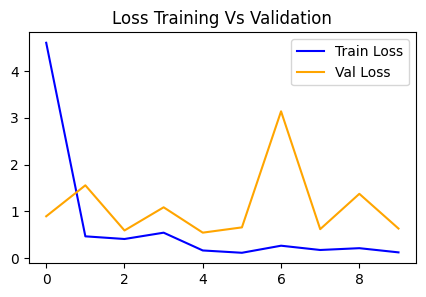

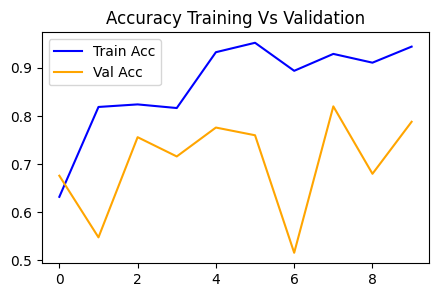

In [14]:
show_result(history)